# Exercise 01 : Line chart with styles
## Required data

In [1]:
%ls ../data/checking-logs.sqlite

../data/checking-logs.sqlite


## Imports

In [2]:
import pandas as pd
import sqlite3

## Connect to database

In [3]:
db_connection = sqlite3.connect('../data/checking-logs.sqlite')

## Get all visit datetimes from `pageviews`

In [4]:
sql_query = """
SELECT
    datetime
FROM 
    pageviews
WHERE
    uid LIKE 'user_%'
"""

pageviews_datetimes_df = pd.read_sql(sql_query, db_connection, parse_dates=['datetime'])
pageviews_datetimes_df

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [5]:
pageviews_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  987 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


## Get all commit datetimes from `checker`

In [9]:
sql_query = """
SELECT
    timestamp as datetime
FROM 
    checker
WHERE
    uid LIKE 'user_%'
"""

commits_datetimes_df = pd.read_sql(sql_query, db_connection, parse_dates=['datetime'])
commits_datetimes_df

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [10]:
commits_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


## Count visits and commits per date

In [11]:
pageviews_per_day_df = pageviews_datetimes_df.groupby(by=[pageviews_datetimes_df['datetime'].dt.date]).count()
pageviews_per_day_df.rename(columns={'datetime': 'views'}, inplace=True)
pageviews_per_day_df.head()

,views
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [14]:
commits_per_day_df = commits_datetimes_df.groupby(by=[commits_datetimes_df['datetime'].dt.date]).count()
commits_per_day_df.rename(columns={'datetime': 'commits'}, inplace=True)
commits_per_day_df.head()

,commits
datetime,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25


## Create a graph

In [15]:
import matplotlib

In [30]:
statistics_per_day = pageviews_per_day_df.join(commits_per_day_df, 
                                               on='datetime',                                               
                                               how='inner')
statistics_per_day.head()

,views,commits
datetime,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28


In [31]:
statistics_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-04-17 to 2020-05-21
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   views    32 non-null     int64
 1   commits  32 non-null     int64
dtypes: int64(2)
memory usage: 768.0+ bytes


<AxesSubplot:title={'center':'Views and commits per day'}, xlabel='datetime'>

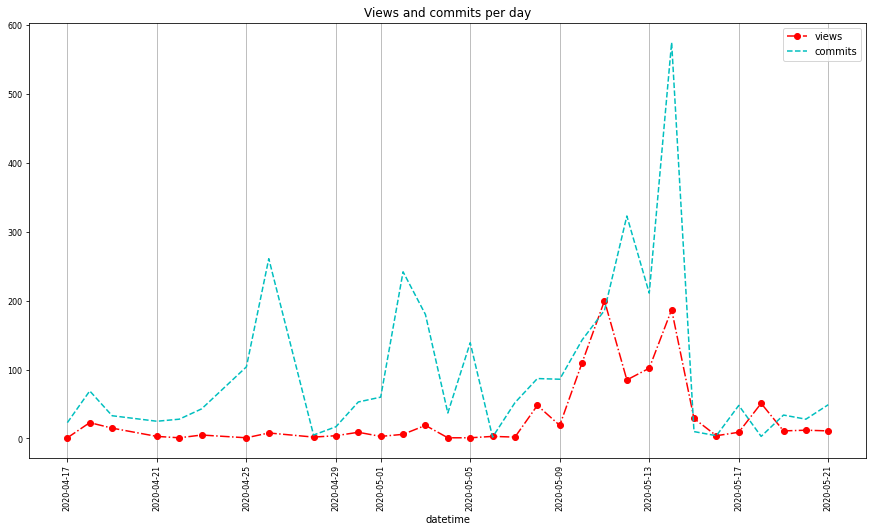

In [29]:
plt = statistics_per_day.plot(figsize=(15, 8),
                              fontsize=8,
                              title='Views and commits per day',
                              rot=90,
                              style={
                                  'views': 'r.-.',
                                  'commits': 'c--'
                              },
                              markersize=12
                             )
plt.grid(axis='x')
plt

## Disconnect database

In [ ]:
db_connection.close()

## How many times was the number of views larger than 150?

The answer is 2